In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import kagglehub


In [3]:
# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 1.02MB/s]

Extracting files...
Path to dataset files: /home/philip/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [4]:
# Load the dataset into a dataframe
file_path = f"{path}/insurance.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [17]:
df['smoker'].unique()


array(['yes', 'no'], dtype=object)

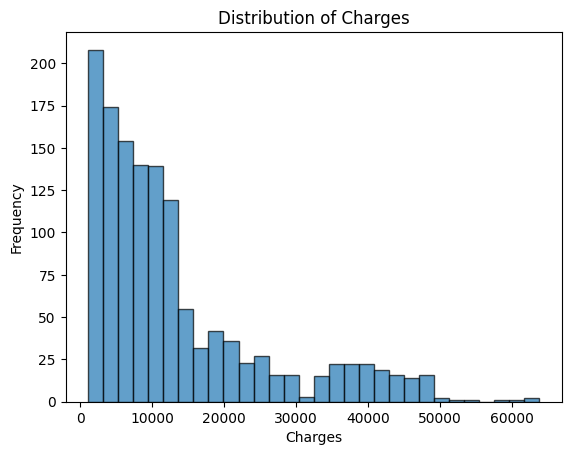

In [9]:
# Make a histogram for the target variable
plt.hist(df['charges'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

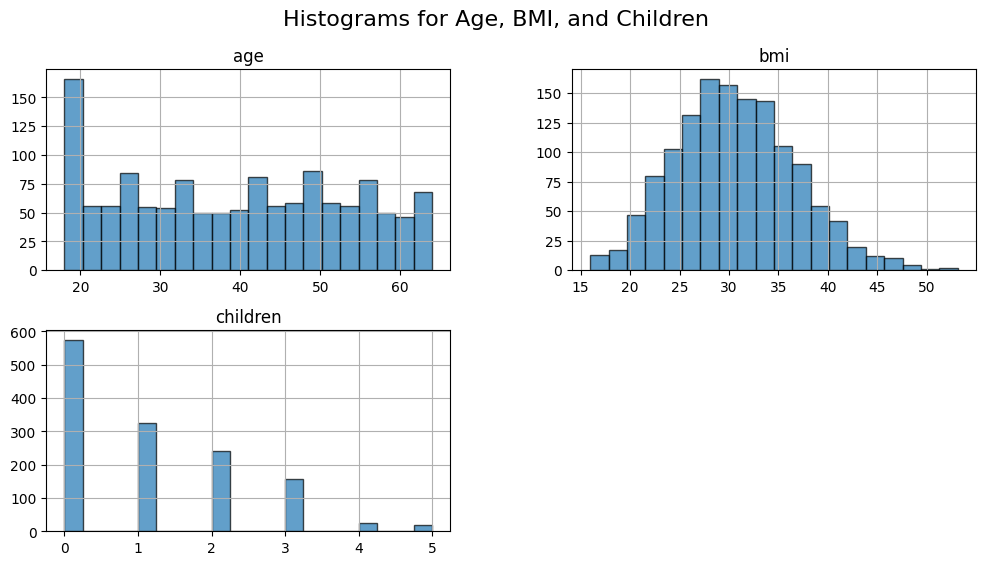

In [10]:
# Create histograms for age, bmi, and children
columns_to_plot = ['age', 'bmi', 'children']
df[columns_to_plot].hist(bins=20, figsize=(12, 6), edgecolor='k', alpha=0.7)

# Add a title to the plot
plt.suptitle('Histograms for Age, BMI, and Children', fontsize=16)
plt.show()

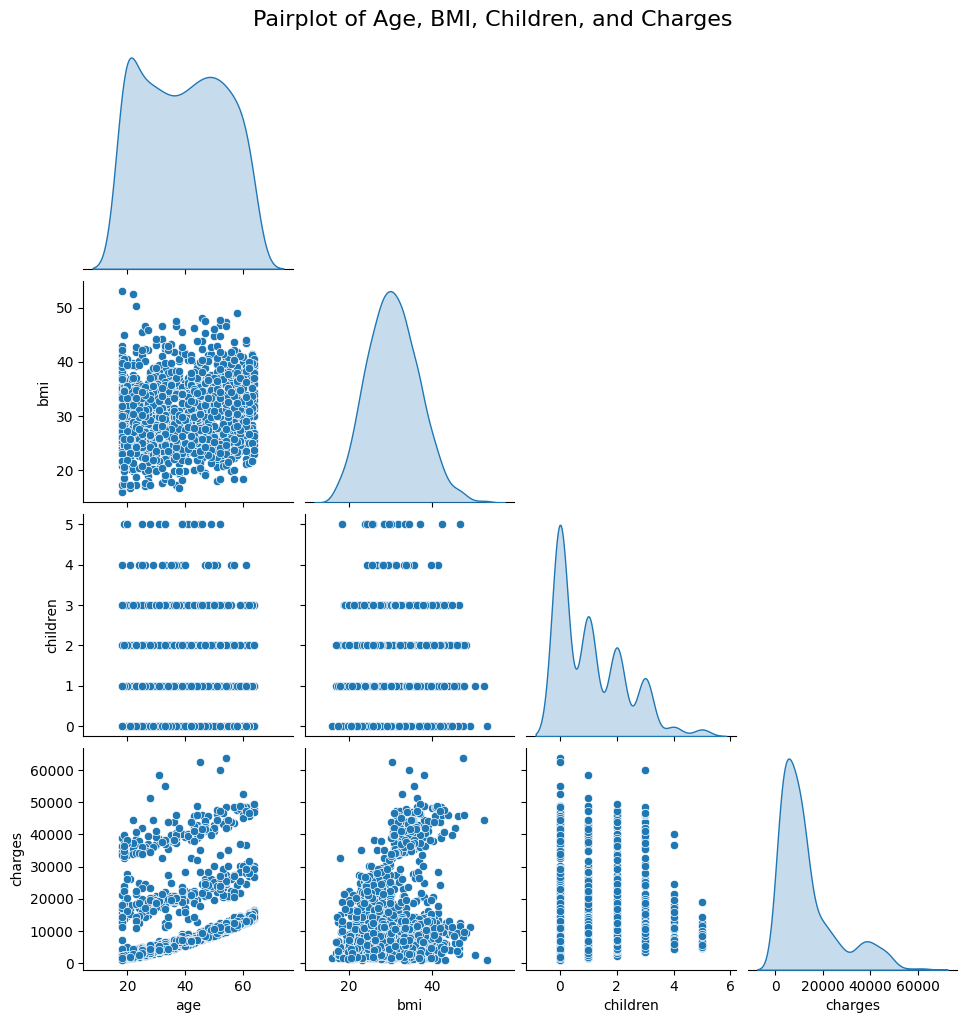

In [11]:
# Create a pairplot for the selected columns
sns.pairplot(df[['age', 'bmi', 'children', 'charges']], diag_kind='kde', corner=True)

# Add a title to the plot
plt.suptitle('Pairplot of Age, BMI, Children, and Charges', y=1.02, fontsize=16)
plt.show()

# Feature Engineering
todo
 - code sex and smoker into 0 and 1 - 1=smoker, 0=non-smoker
 - code region into 0, 1, 2, 3 - 0=southwest, 1=southeast, 2=northwest, 3=northeast
 - create bmi categories - underweight, normal, overweight, obese
 - create age categories - young_adult <30, adult, pensioner >62

In [19]:
# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create the bmi_cat column
df['bmi_cat'] = df['bmi'].apply(categorize_bmi)

# Display the first few rows to verify
df[['bmi', 'bmi_cat']].head()

,bmi,bmi_cat
0,27.900,Overweight
1,33.770,Obese
2,33.000,Obese
3,22.705,Normal
4,28.880,Overweight


In [20]:
# Define age categories
def categorize_age(age):
    if age < 30:
        return 'young_adult'
    elif 30 <= age <= 62:
        return 'adult'
    else:
        return 'pensioner'

# Apply the function to create the age_cat column
df['age_cat'] = df['age'].apply(categorize_age)

# Display the first few rows to verify
df[['age', 'age_cat']].head()

,age,age_cat
0,19,young_adult
1,18,young_adult
2,28,young_adult
3,33,adult
4,32,adult


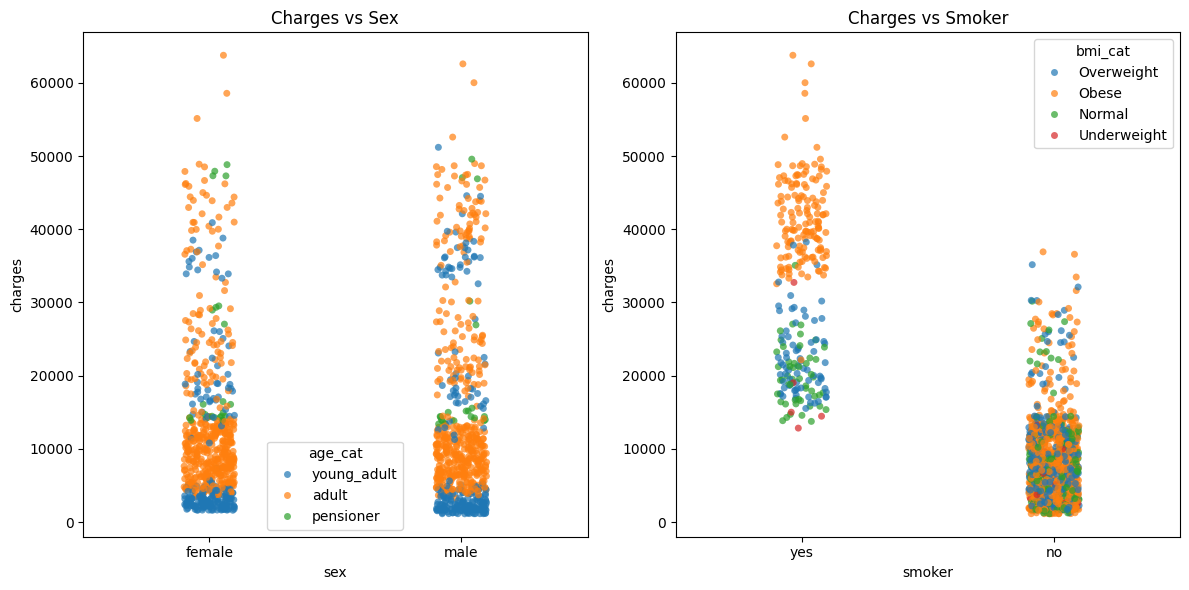

In [26]:
# Strip plot for charges vs sex
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.stripplot(data=df, x='sex', y='charges', jitter=True, hue='age_cat', alpha=0.7)
plt.title('Charges vs Sex')

# Strip plot for charges vs smoker
plt.subplot(1, 2, 2)
sns.stripplot(data=df, x='smoker', y='charges', jitter=True, hue='bmi_cat' ,alpha=0.7)
plt.title('Charges vs Smoker')

plt.tight_layout()
plt.show()